In [212]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime, timedelta, date
from configparser import SectionProxy
from logging import Logger
import logging

from typing import Mapping, Optional, Dict, List, Tuple

link = 'https://andelenergi.dk/?obexport_format=csv&obexport_start=2022-08-10&obexport_end=2022-08-18&obexport_region=east'

region = 'east'
transport_overhead = 1.59 #DKK

logger = logging.getLogger(__name__)
logger.info('Getting price data')

def make_El_price_URL(start_date: date, end_date: date, region: str) -> str:
    url = 'https://andelenergi.dk/?obexport_format=csv&obexport_start='+str(start_date)+'&obexport_end='+str(end_date)+'&obexport_region='+region
    return url

def get_price_csv(start_date, end_date, region):
    url = make_El_price_URL(start_date, end_date, region)
    try:
        el_data = pd.read_csv(url, decimal=',')
    except Exception as e:
        logger.exception('Error getting price data from: %s', url)
        return None
    el_data.Date = pd.to_datetime(el_data.Date)#.dt.date
    el_data2 = el_data.set_index('Date')
    el_data2.columns = pd.to_datetime(el_data2.columns)
    el_data2_st = el_data2.stack()
    dates = el_data2_st.index.get_level_values(0) 
    times = el_data2_st.index.get_level_values(1) 
    times.to_pydatetime()

    df = pd.DataFrame(columns= ['Date', 'Time', 'Datetime','Price'])
    df['Date'] = dates.date.astype(str)
    df['Time'] = times.time.astype(str)
    df['Hour'] = times.hour.astype(str)
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' +df['Time'])
    df['Price'] = el_data2_st.values+transport_overhead
    df['Weekday'] = df['Datetime'].dt.day_name()
    df['Weekday'] = df['Weekday'].str.slice(0, 3)

    df_future = df[df['Datetime']>str(datetime.now())]
    return df_future

now = datetime.today()
df_future = get_price_csv(now.date(), now.date()+timedelta(days=1), region)

print(df_future)

          Date      Time            Datetime  Price Hour Weekday
21  2022-08-20  21:00:00 2022-08-20 21:00:00  6.612   21     Sat
22  2022-08-20  22:00:00 2022-08-20 22:00:00  6.371   22     Sat
23  2022-08-20  23:00:00 2022-08-20 23:00:00  5.858   23     Sat
24  2022-08-21  00:00:00 2022-08-21 00:00:00  5.591    0     Sun
25  2022-08-21  01:00:00 2022-08-21 01:00:00  5.133    1     Sun
26  2022-08-21  02:00:00 2022-08-21 02:00:00  5.076    2     Sun
27  2022-08-21  03:00:00 2022-08-21 03:00:00  4.791    3     Sun
28  2022-08-21  04:00:00 2022-08-21 04:00:00  4.594    4     Sun
29  2022-08-21  05:00:00 2022-08-21 05:00:00  4.604    5     Sun
30  2022-08-21  06:00:00 2022-08-21 06:00:00  4.993    6     Sun
31  2022-08-21  07:00:00 2022-08-21 07:00:00  4.829    7     Sun
32  2022-08-21  08:00:00 2022-08-21 08:00:00  4.677    8     Sun
33  2022-08-21  09:00:00 2022-08-21 09:00:00  4.540    9     Sun
34  2022-08-21  10:00:00 2022-08-21 10:00:00  3.957   10     Sun
35  2022-08-21  11:00:00 

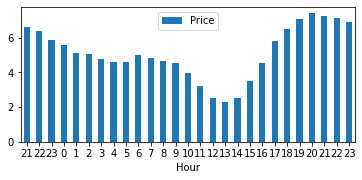

In [213]:
vsize = 448-200
hsize = 600
dpi = 100
ax = df_future.plot.bar(x='Hour', y='Price', rot=0, figsize=(hsize/dpi,vsize/dpi))


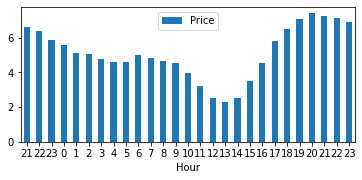

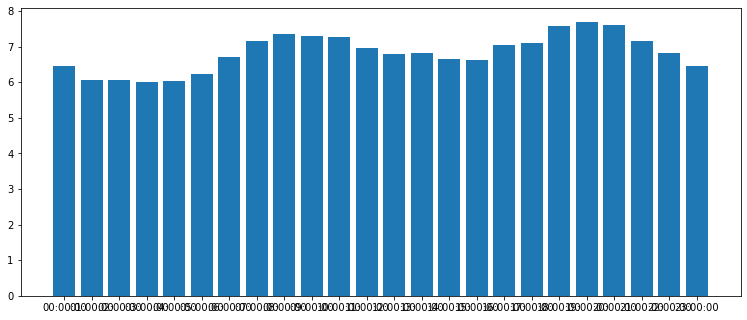

In [196]:
fig = plt.figure(figsize=[10,4])
ax = fig.add_axes([0,0,1,1])
ax.bar(df_future.Time,df_future.Price)
plt.show()